In [9]:
import numpy as np
import matplotlib.pyplot as plt



from pylab import *


from skrf.media import DistributedCircuit
from skrf import Frequency
from skrf import network
from skrf.network import *

from skrf import plotting 

import matplotlib.pyplot as plt

from IPython.display import Image  

%matplotlib inline

my_params = {
'figure.dpi': 240,
'figure.figsize': [10,10],
'figure.subplot.left' : 0.15,
'figure.subplot.right' : 0.9,
'figure.subplot.bottom' : 0.12,
'axes.titlesize' : 'medium',
'axes.labelsize' : 10 ,
'ytick.labelsize' :'small',
'xtick.labelsize' :'small',
'legend.fontsize' : 8, #small,
'legend.loc' : 'best',
'font.size' : 10.0,
'font.family' : 'serif',
'text.usetex' : False, # if you dont have latex
}
rcParams.update(my_params)

In [10]:
## Defino las funciones para agregar componentes en derivación (Zparal) y en serie (Yserie). 
## La salida es una variable Network de skrf

def Yserie(freq, ys, z0=50):
    y = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        y[i,0,0] =  ys
        y[i,0,1] = -ys
        y[i,1,0] = -ys
        y[i,1,1] =  ys
    a = network.y2s(y,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk


def Zparal(freq, zp, z0=50):
    z = np.empty(shape=(len(freq.f),2,2), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  zp
        z[i,0,1] =  zp
        z[i,1,0] =  zp
        z[i,1,1] =  zp
    a = network.z2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

## Convierte a network de skrf una impedancia de carga dada. 

def ZL(freq, zl, z0=50):
    z = np.empty(shape=(len(freq.f),1,1), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  zl
    a = network.z2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

## Convierte a network de skrf una admitancia de carga dada.
def YL(freq, yl, z0=50):
    y = np.empty(shape=(len(freq.f),1,1), dtype=complex)
    for i,f in enumerate(freq.f):
        z[i,0,0] =  yl
    a = network.y2s(z,z0=z0)
    ntwk = Network(frequency=freq, s= a, z0=z0)
    return ntwk

# Calcula X dada una frecuencia y un valor de capacidad
def Xc(f, C):
    if C == 0 : x = np.inf
    else      : x = (2*np.pi*f*C)**-1 
    return x


# Calcula X dada una frecuencia y un valor de inductancia
def Xl(f, L):
    return (2*np.pi*f*L) 

# Calcula B dada una frecuencia y un valor de inductancia
def Bl(f, L):
    if L == 0 : y = np.inf
    else      : y = (2*np.pi*f*L)**-1 
    return y 

# Calcula B dada una frecuencia y un valor de capacidad
def Bc(f, C):
    return (2*np.pi*f*C) 

## Es importante correr el código siguiente en orden para no alterar los valores guardados en nw

Suponer que $R_g = 100 \Omega$, $R_L = 50 \Omega$, $f_o = 10MHz$ y $Q_c = 10$.


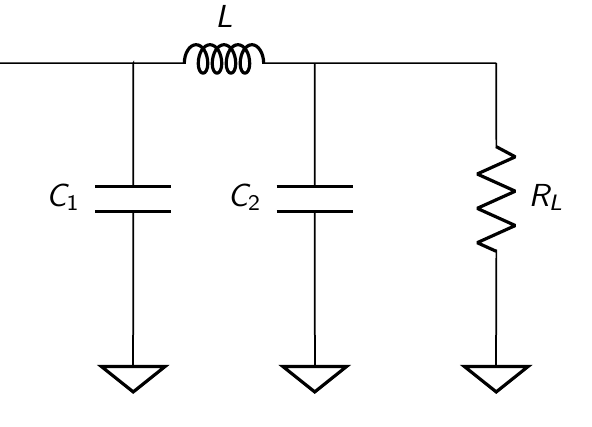

In [11]:
Image(filename= "fig/smithPI.png",width=450) 

fo = 1e+07 Hz


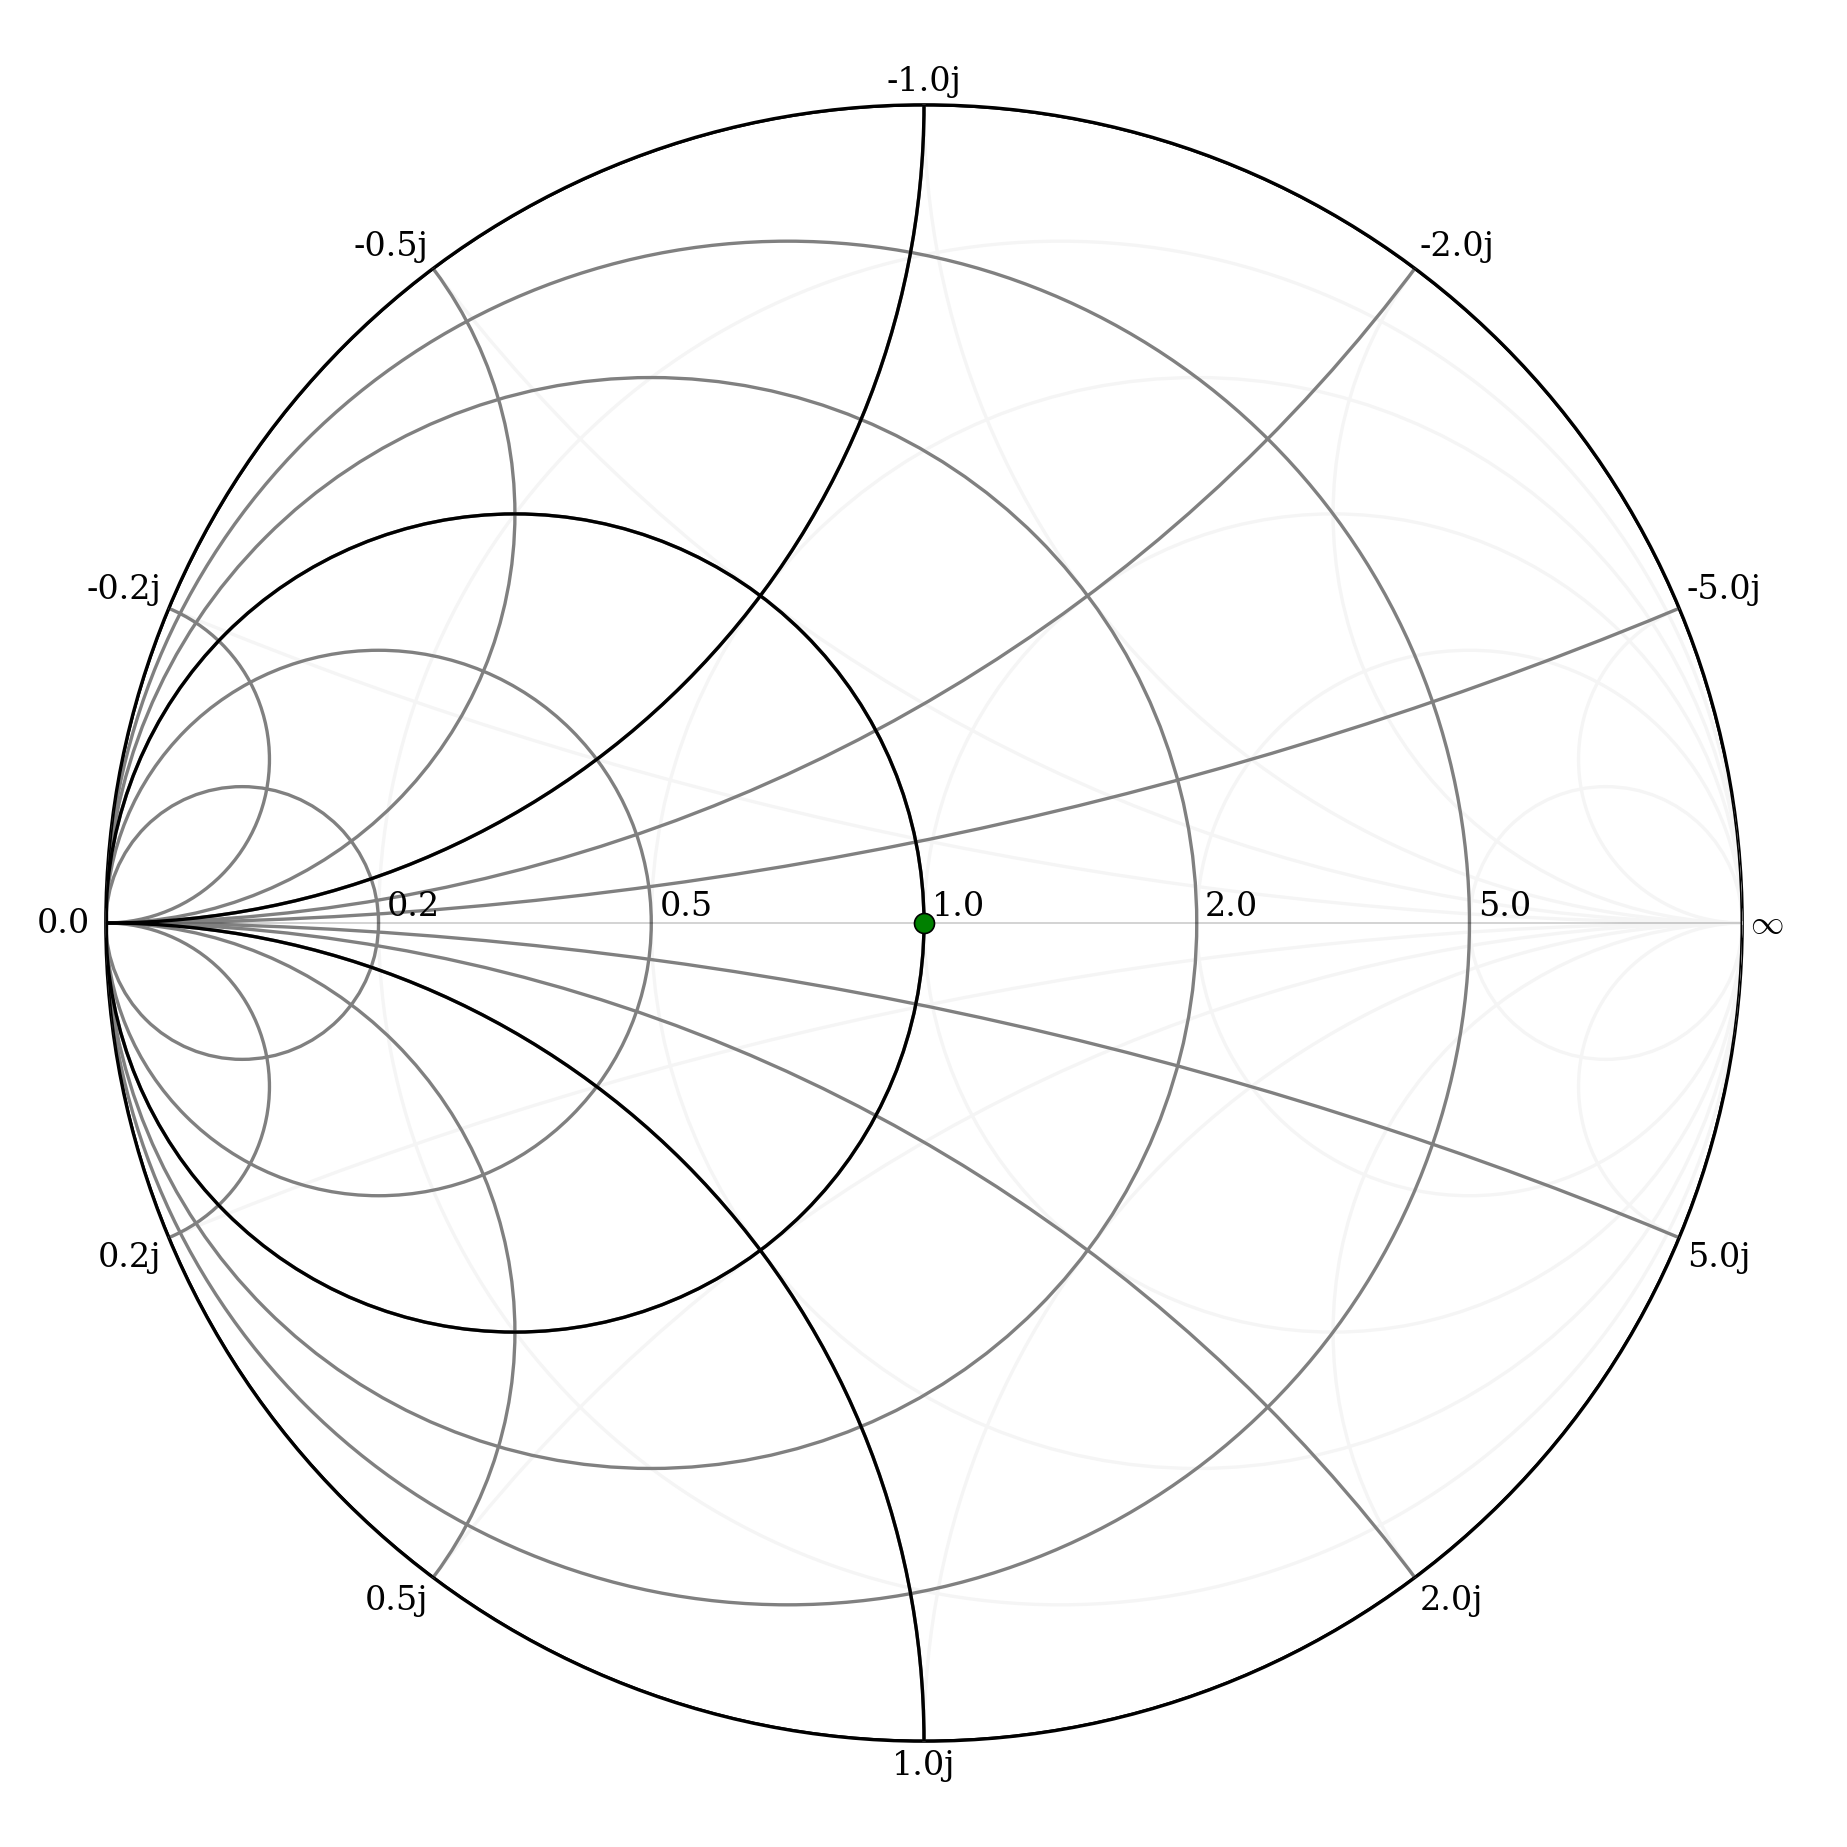

0.0


In [12]:
## Frecuencia de trabajo
freq = Frequency(10,10,1,'mhz')
print('fo = {:0.4} Hz'.format(float(freq.f) ) )

# impedancia de referencia
z0 = 50
# impedancia de carga
RL = 50

# el diseño se realiza desde la carga y hacia la fuente
# la función ZL devuelve una variable network de skrf
nw1 =  ZL(freq,RL,z0)

# Plot de la carta de smith usando la carga
nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
plt.show()
# defino la variable para memorizar la adaptación.
nw   = nw1 

Q = abs( (nw.z[-1,0,0]).imag ) / (nw.z[-1,0,0]).real 
print(Q)

(50+0j)
(1.00722465464+7.02472285766j)
6.97433569097


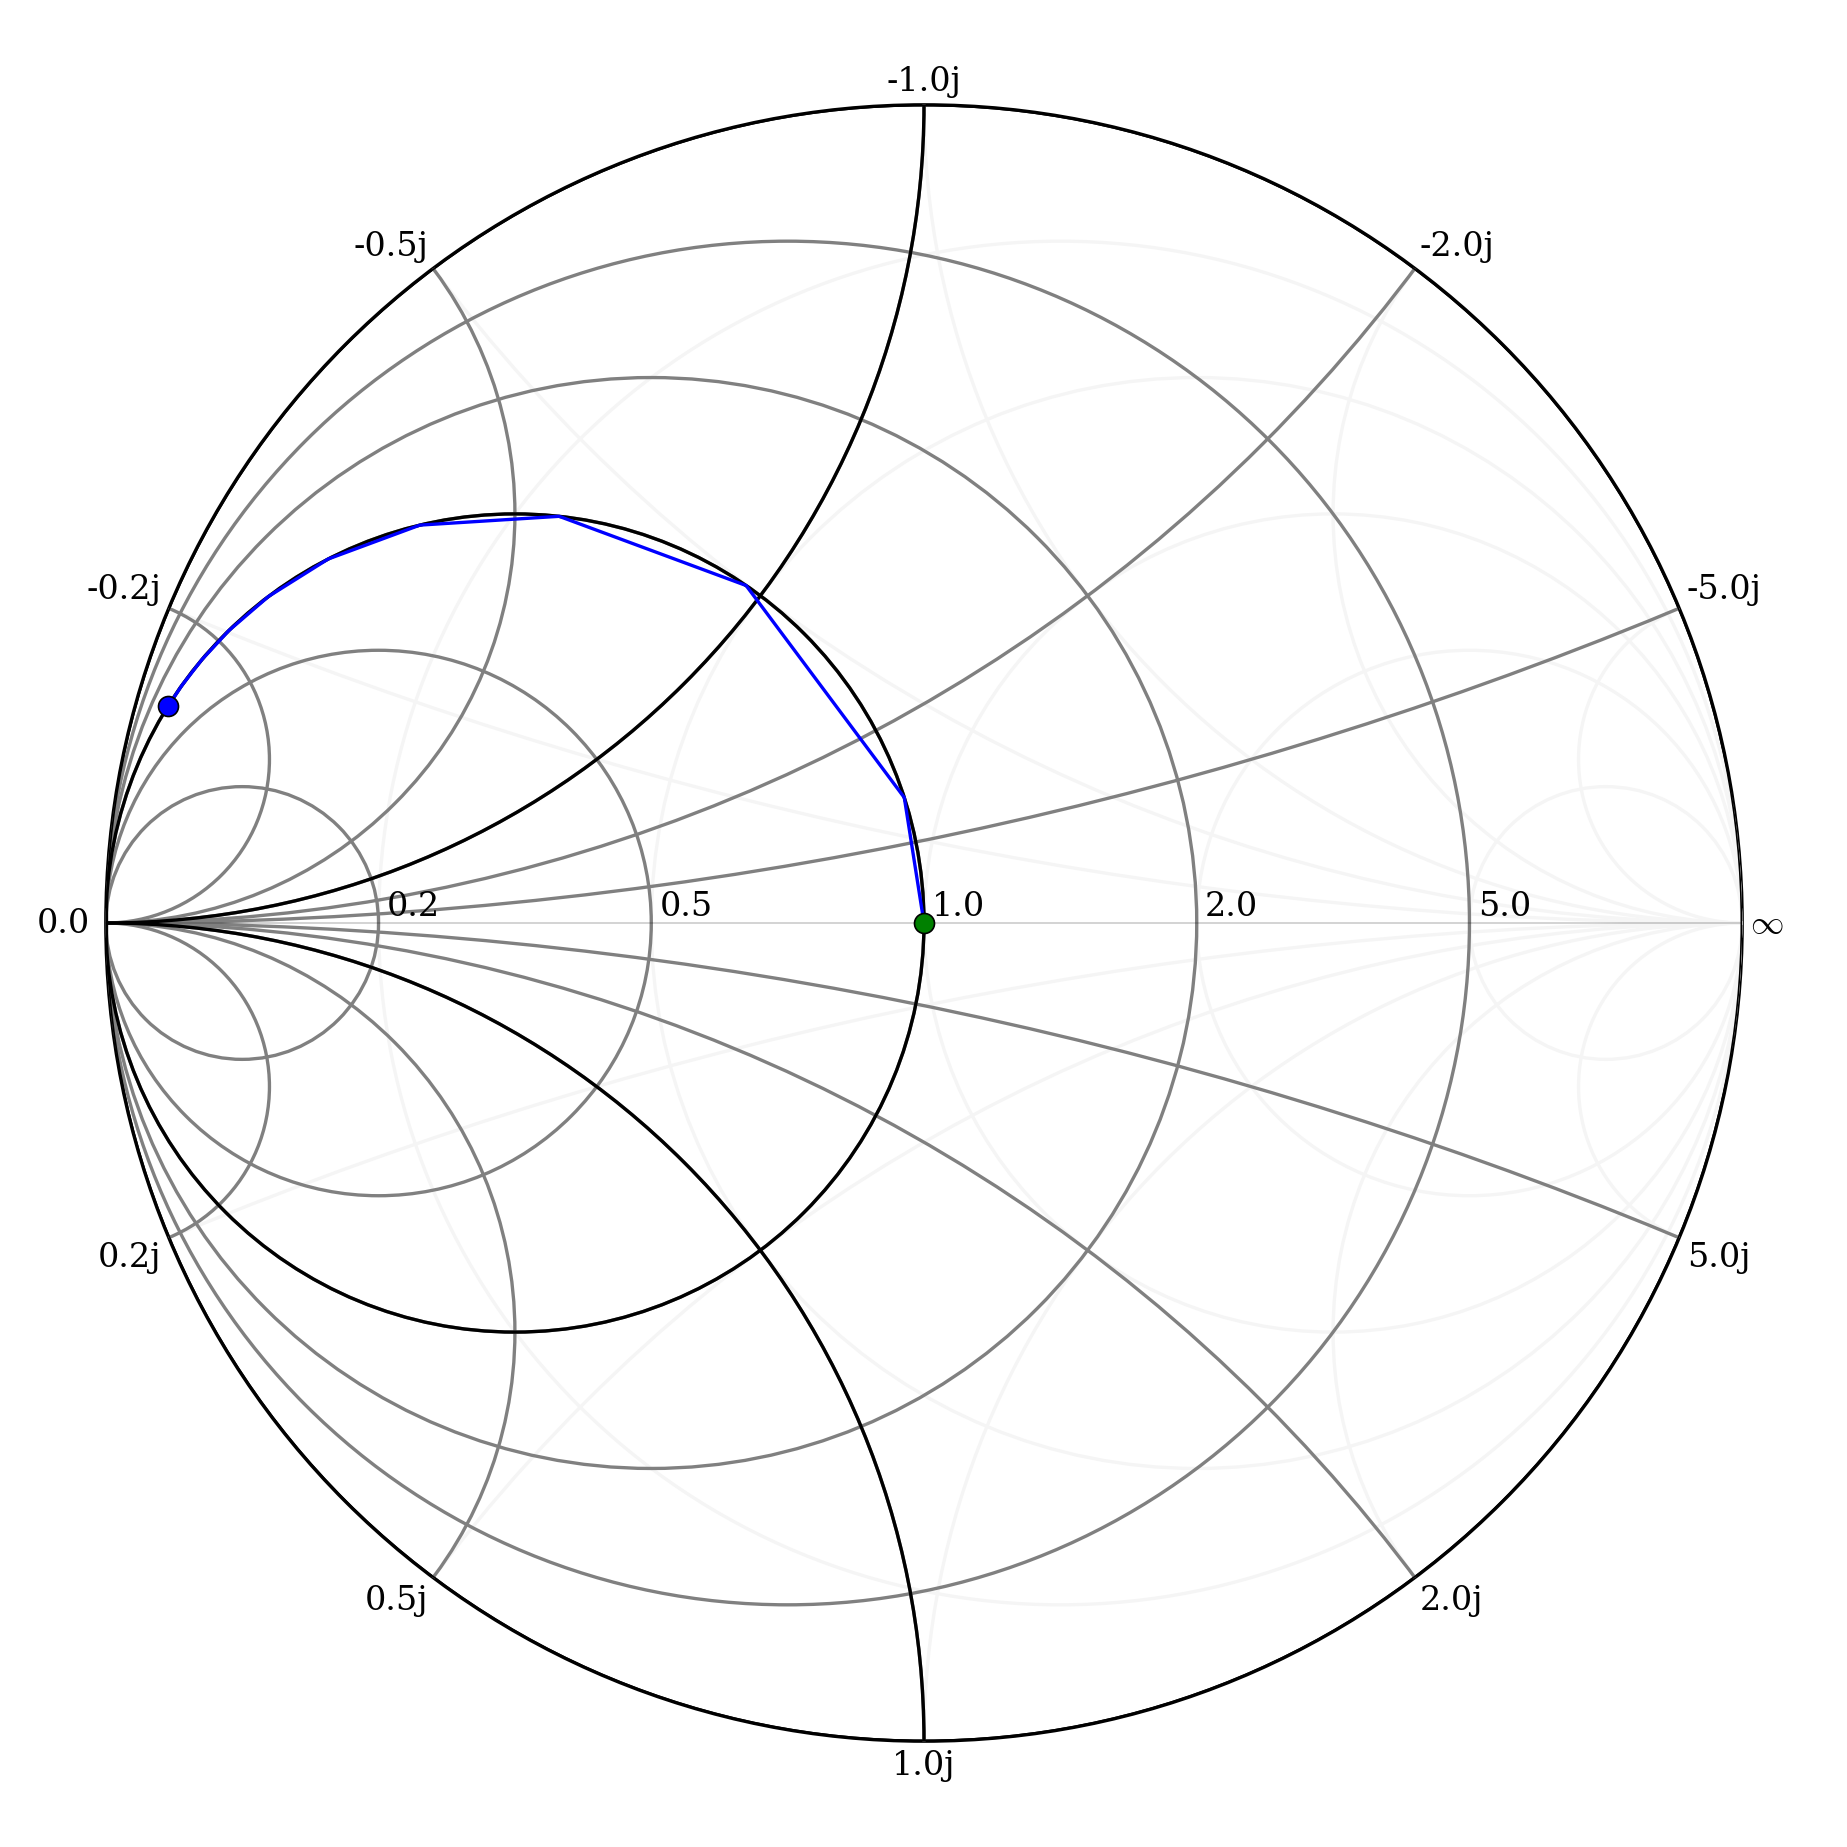

In [13]:
# Defino el valor de capacidad paralelo
C1p = np.linspace(0.1e-9, 2.22e-9, 10)

for c in C1p:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw2  = cascade(nwa,nw1)
    nw   = stitch(nw,nw2 )    

nw.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz')
nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 

print(nw.z[0,0,0])
print(nw.z[-1,0,0])   

Q = abs( (nw.z[-1,0,0]).imag ) / (nw.z[-1,0,0]).real  
print(Q)

(50+0j)
(1.00722465464-9.96501021295j)
9.89353285493


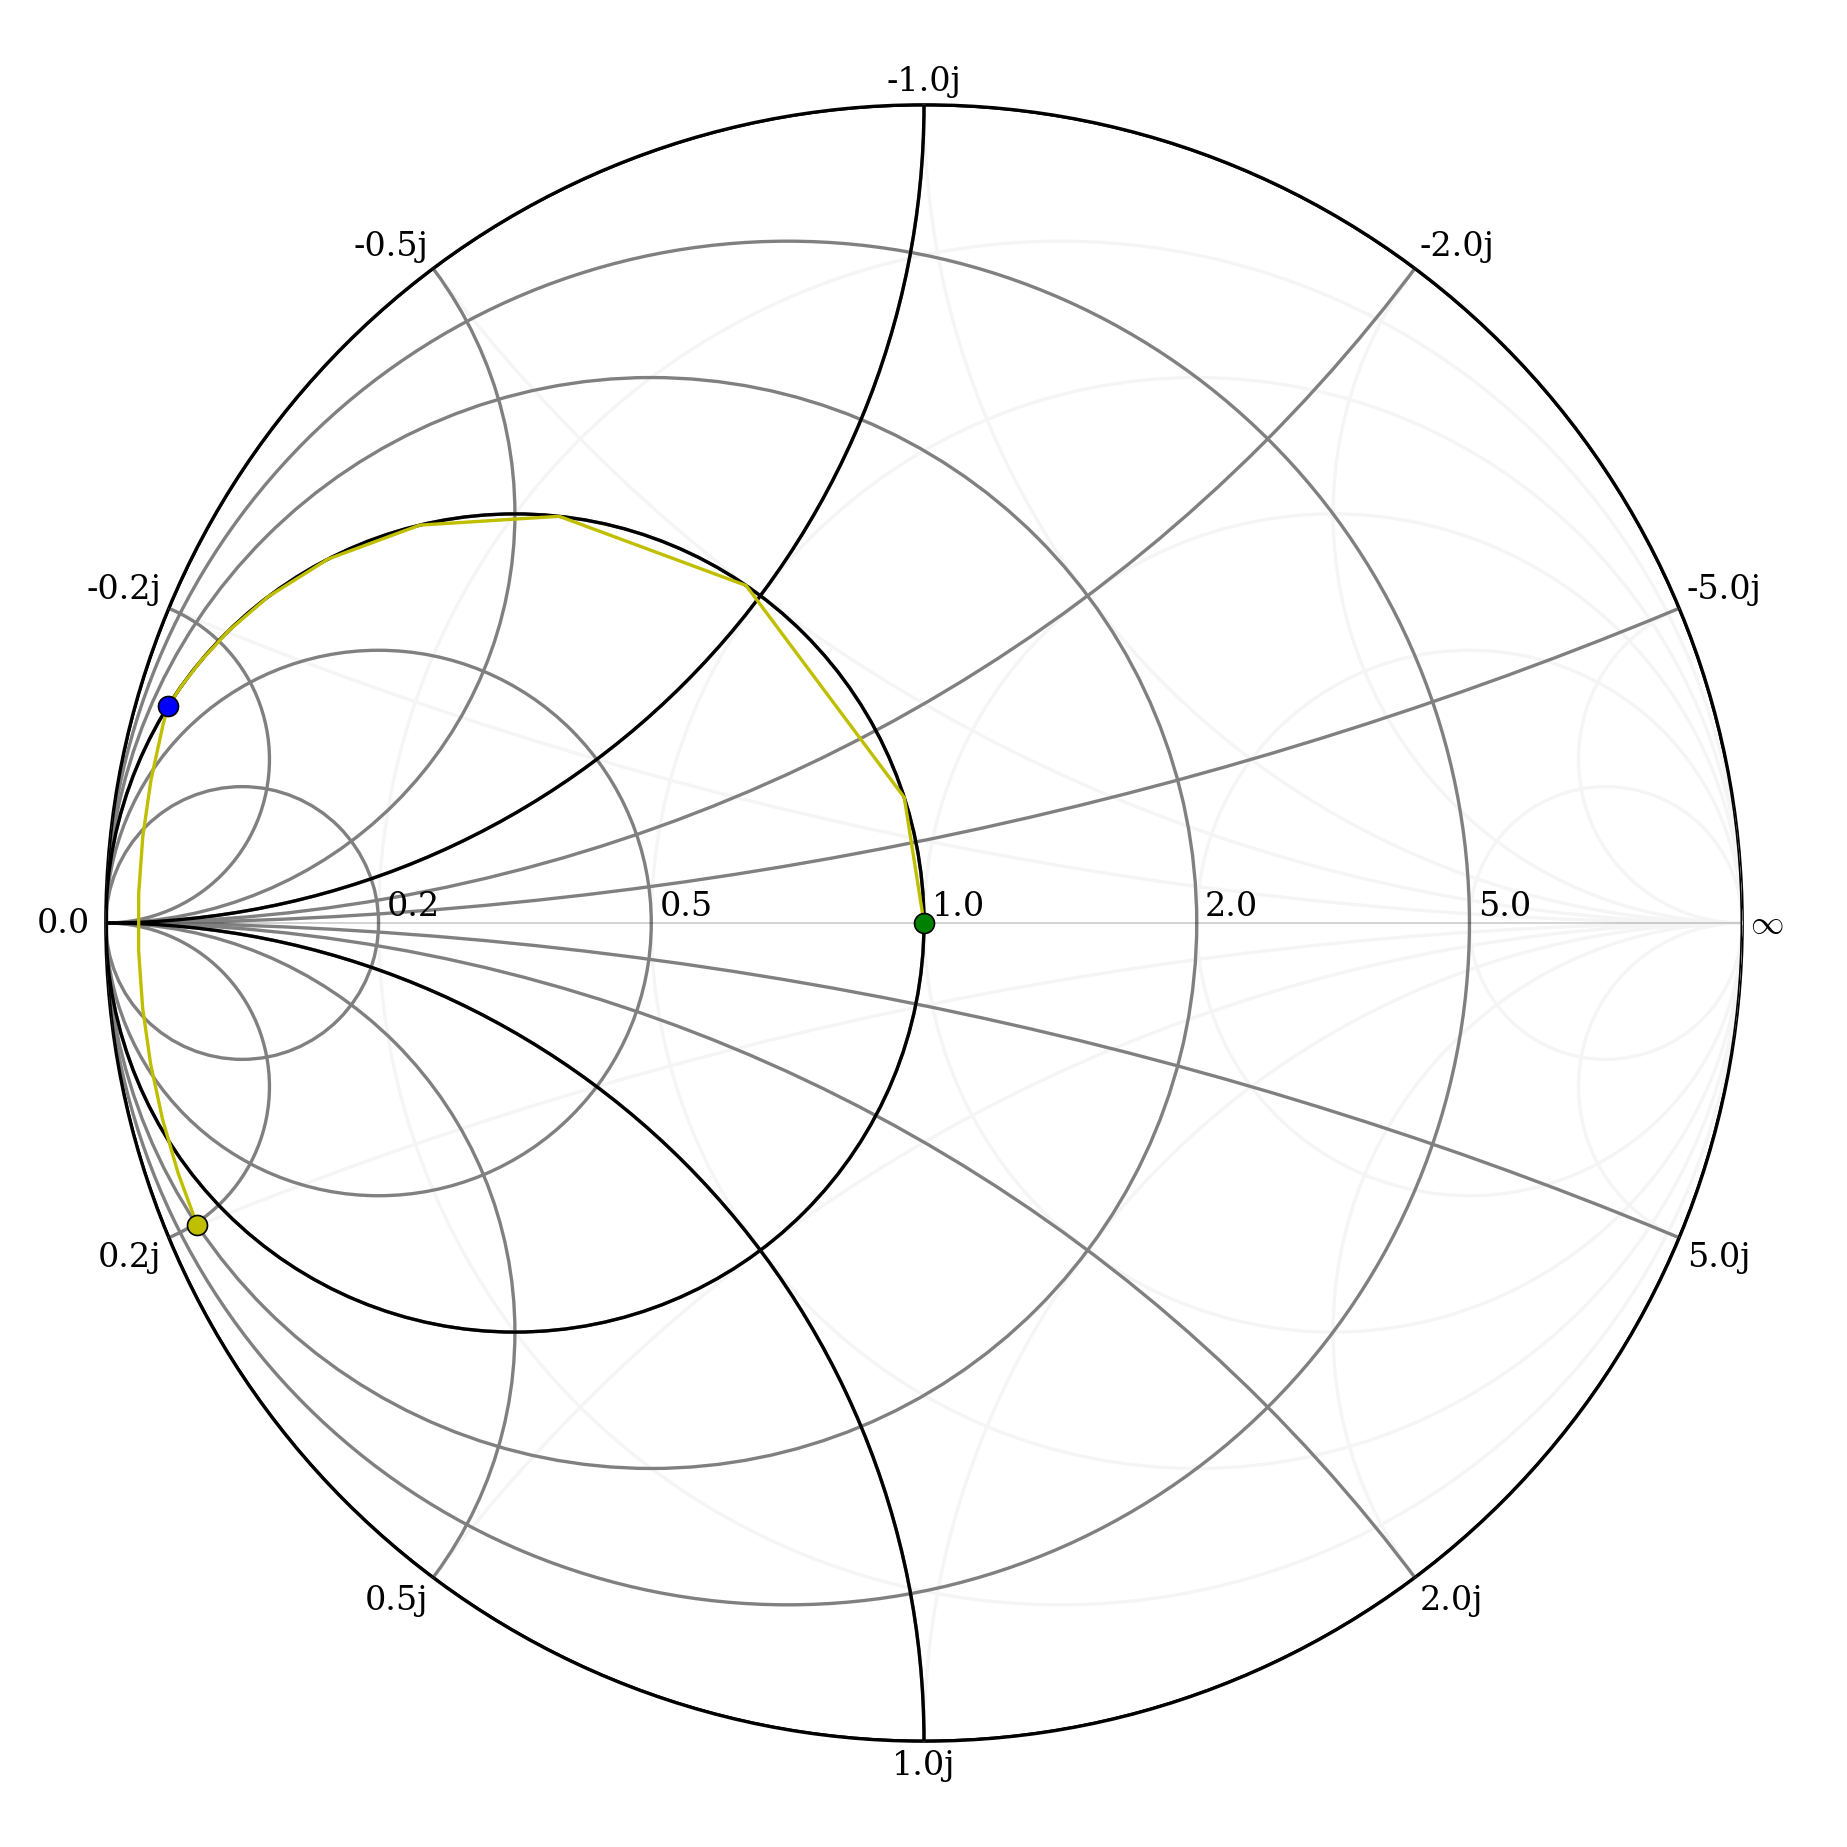

In [14]:
# Defino el valor de inductancia serie
L1s = np.linspace(10e-9, 270.4e-9, 10)

for l in L1s:
    nwa = Yserie(freq,1j*Bl(freq.f[0],l),z0)
    nw3 = cascade(nwa,nw2)
    nw   = stitch(nw,nw3 ) 

nw.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz')
nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 
nw3.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
print(nw.z[0,0,0])
print(nw.z[-1,0,0])

Q = abs( (nw.z[-1,0,0]).imag ) / (nw.z[-1,0,0]).real 

print(Q)

(50+0j)
(99.2804710579+5.60032568462j)
0.0564091369123


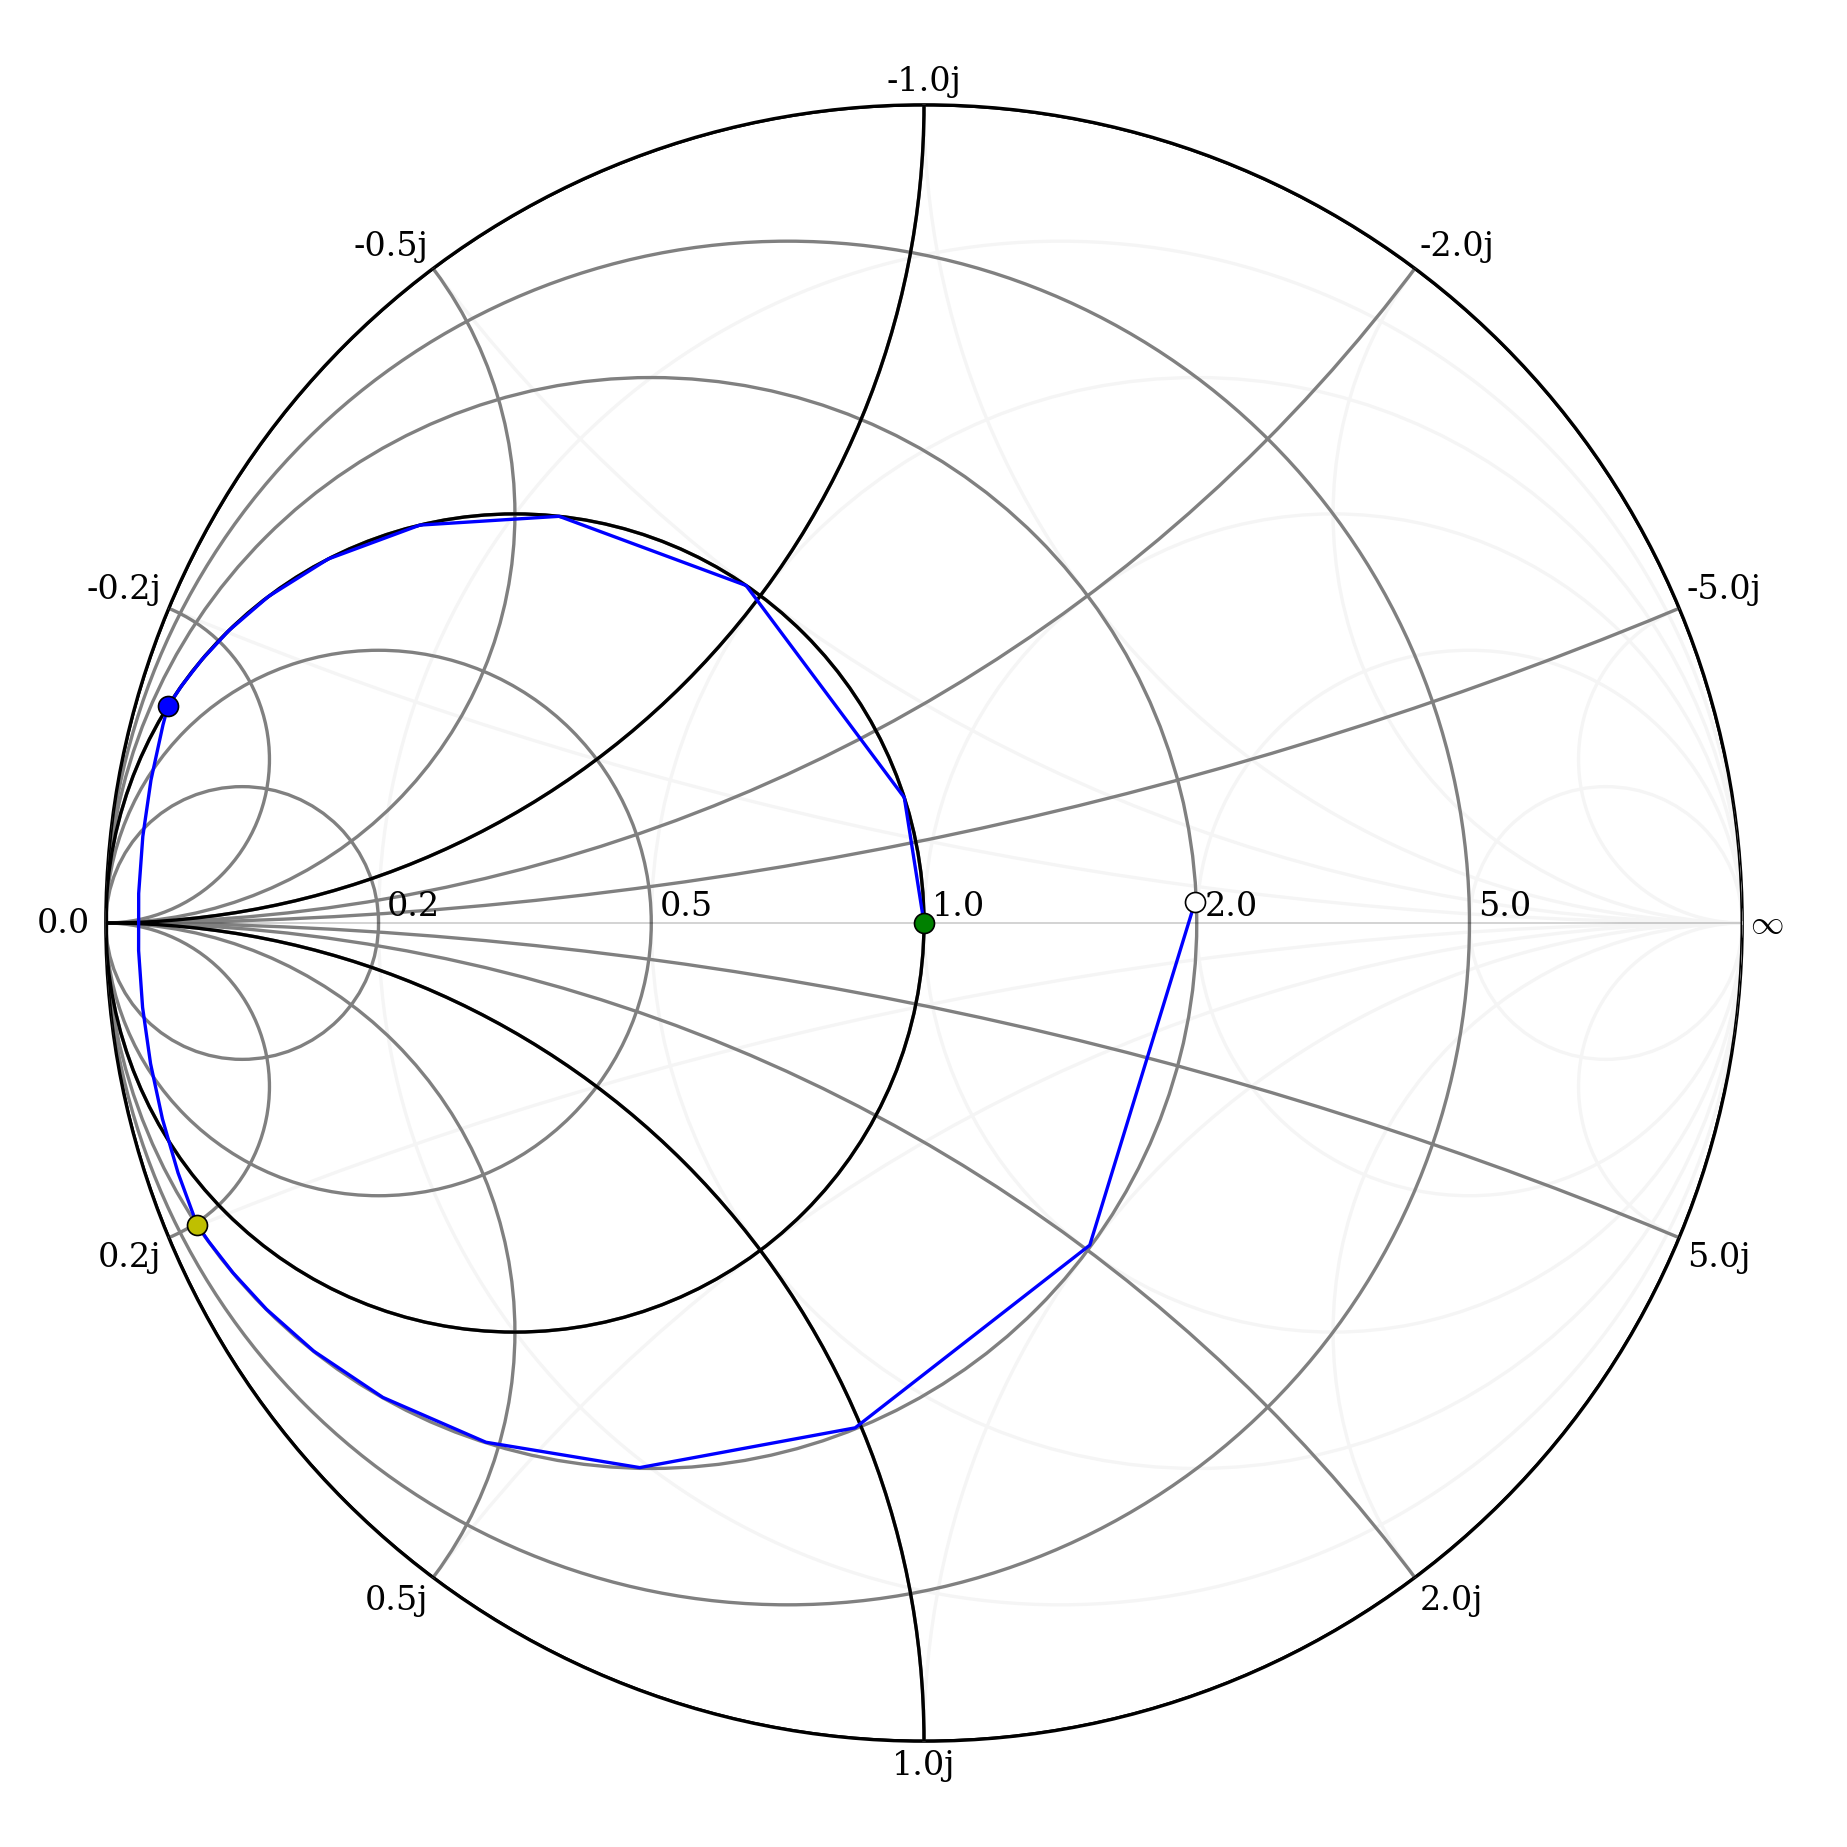

In [15]:
# Defino el valor de capacidad paralelo
C2p = np.linspace(0.1e-9, 1.59e-9, 10)

for c in C2p:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw4  = cascade(nwa,nw3)
    nw   = stitch(nw,nw4 )    
 

nw.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz')
nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 
nw3.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw4.plot_s_smith(m=0,n=0,color='w',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
print(nw.z[0,0,0])
print(nw.z[-1,0,0])

Q = abs( (nw.z[-1,0,0]).imag ) / (nw.z[-1,0,0]).real 
print(Q)

(50+0j)
(99.2804710579+5.60032568462j)


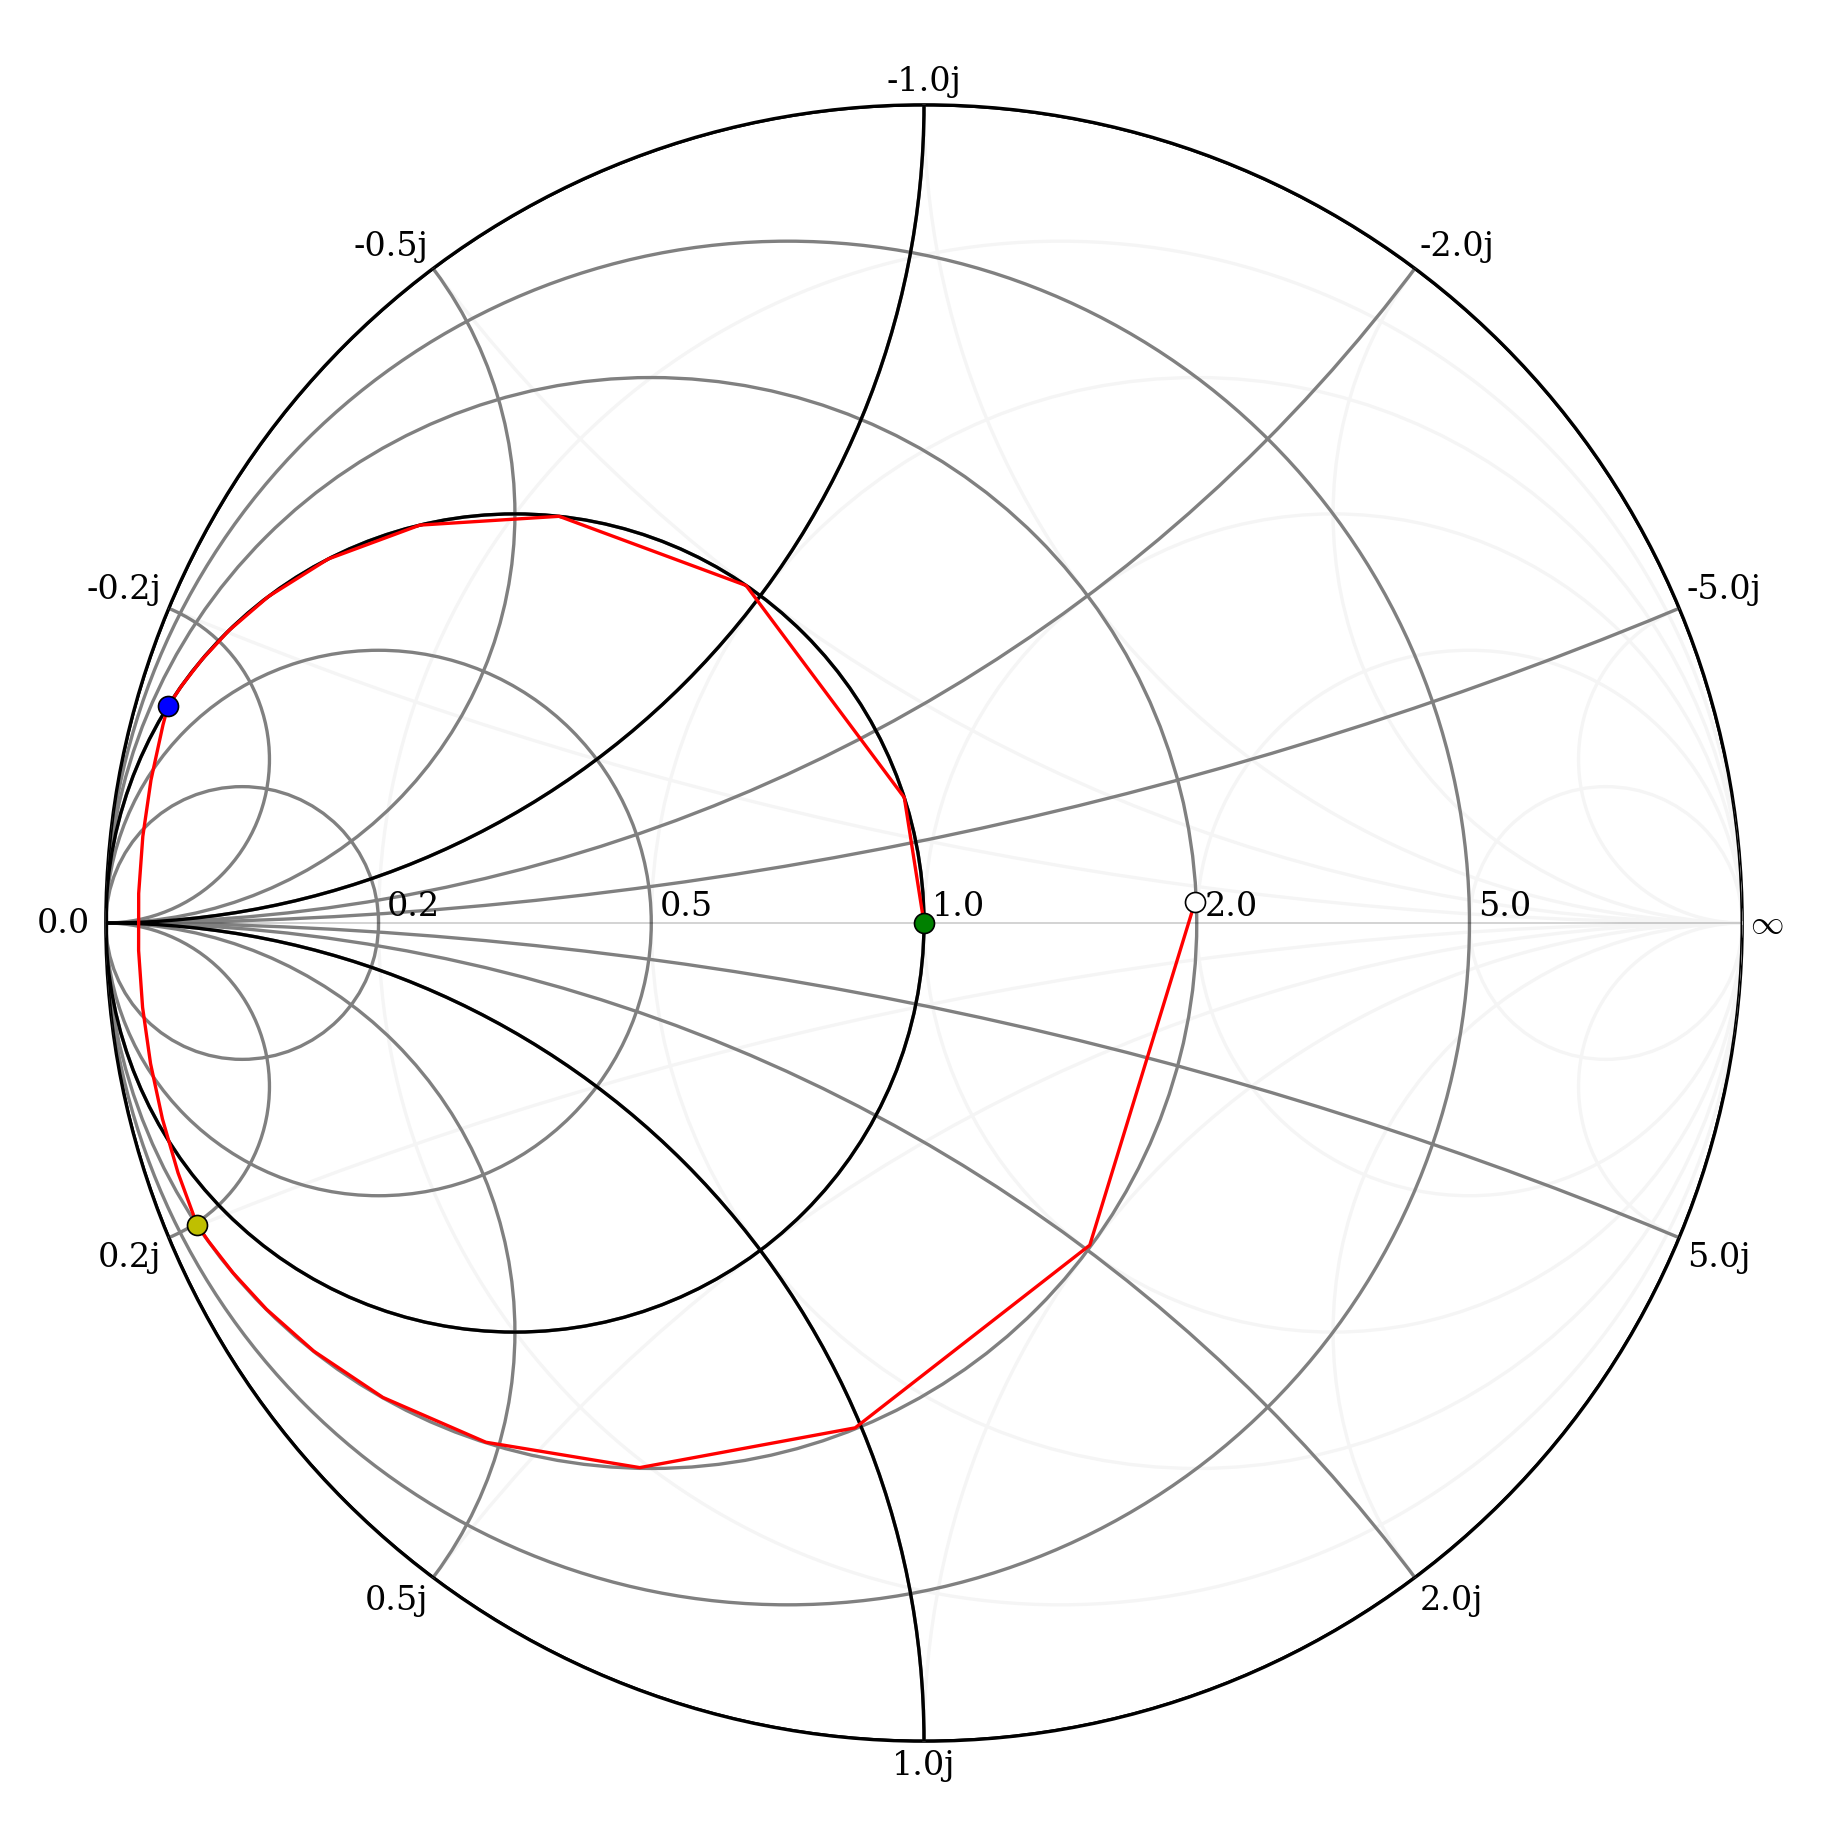

In [16]:
nw1 =  ZL(freq,RL,z0)
nw   = nw1 


for c in C1p:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw2  = cascade(nwa,nw1)
    nw   = stitch(nw,nw2 )    

for l in L1s:
    nwa = Yserie(freq,1j*Bl(freq.f[0],l),z0)
    nw3 = cascade(nwa,nw2)
    nw   = stitch(nw,nw3 )


for c in C2p:
    nwa = Zparal(freq,1j*Xc(freq.f[0],c),z0)
    nw4  = cascade(nwa,nw3)
    nw   = stitch(nw,nw4 )    


nw.plot_s_smith(m=0,n=0,color='r',draw_labels=True,show_legend = False, chart_type='yz')
#plotting.smith(draw_vswr=[100.0] )

nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 
nw3.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw4.plot_s_smith(m=0,n=0,color='w',draw_labels=True,show_legend = False, chart_type='yz',marker='o')

print(nw.z[0,0,0])
print(nw.z[-1,0,0])